In [98]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
compounds = [
    'gemfibrozil',
    'fenofibrate',
    'WY-14643',
    'clofibrate'
]

In [6]:
df = pd.read_csv('TGG_study_dataset.csv')

In [7]:
dg = pd.DataFrame()

for compound in compounds:
    df_sub = df[df['compound'] == compound]
    dg = pd.concat([dg, df_sub])

In [8]:
dg = dg.drop(columns = ['replicate', 'rawNewFile'])

In [9]:
dg = dg.dropna(subset=['limmaNewFile']).drop_duplicates()

In [10]:
dg.head()

,study,dosing,organism,organ,compound,time,time unit,dose,limmaNewFile
1160,in_vitro,NaN,Human,Liver,gemfibrozil,2,hr,high,TGG-data/in_vitro/Human/Liver/fold_changes/gem...
1162,in_vitro,NaN,Human,Liver,gemfibrozil,2,hr,low,TGG-data/in_vitro/Human/Liver/fold_changes/gem...
1164,in_vitro,NaN,Human,Liver,gemfibrozil,2,hr,middle,TGG-data/in_vitro/Human/Liver/fold_changes/gem...
1168,in_vitro,NaN,Human,Liver,gemfibrozil,24,hr,high,TGG-data/in_vitro/Human/Liver/fold_changes/gem...
1170,in_vitro,NaN,Human,Liver,gemfibrozil,24,hr,low,TGG-data/in_vitro/Human/Liver/fold_changes/gem...


### Find logFC values for Marvin's set of genes

In [5]:
genes = "19013; 25747; 403654; 5465"  # copied from Marvin's file

genes = genes.split(';')
genes = [int(x.strip()) for x in genes]
genes

[19013, 25747, 403654, 5465]

In [ ]:
dgnew = dg.copy()

for index, row in dg.iterrows():
    file = row['limmaNewFile']
    
    dfl = pd.read_csv(file)
    print(file)
    for gene in genes:
        result = dfl[dfl['ENTREZID'] == int(gene)].mean()['logFC']
        dgnew.at[index, str(gene)] = result

### Human / In vitro / Liver / High dose

In [173]:
deg = []

for index, row in dg[dg['organism'] == 'Human'].iterrows():
    file = row['limmaNewFile']
    
    lf = pd.read_csv(file)
    
    # find DEG
    assay_deg = lf[((lf['logFC'] > 1) | (lf['logFC'] < -1)) & (lf['P.Value'] < 0.05) ]['ENTREZID'].unique().tolist()
    if len(assay_deg) > 0:
        for gene in assay_deg:
            deg.append(gene)
    
# filter only unique genes
deg = list(set(deg))

dgnew = dg[dg['organism'] == 'Human'].copy()

for index, row in dg[dg['organism'] == 'Human'].iterrows():
    file = row['limmaNewFile']
    
    dfl = pd.read_csv(file)
    for gene in deg:
        result = dfl[dfl['ENTREZID'] == int(gene)].mean()['logFC']
        dgnew.at[index, str(gene)] = result

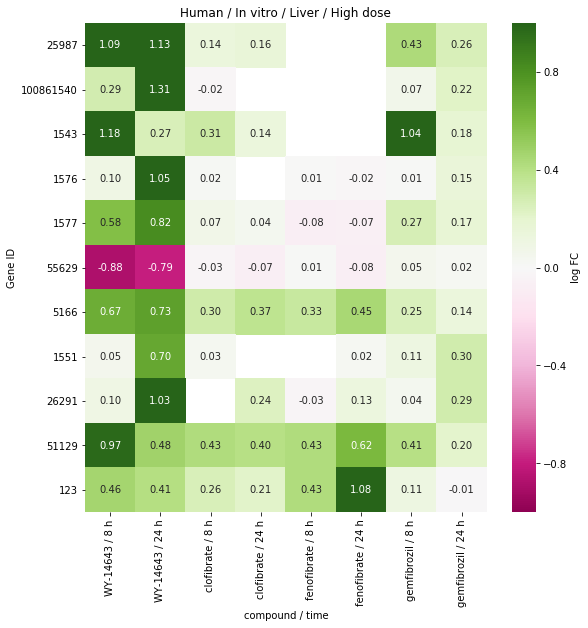

In [177]:
dgplot = dgnew[(dgnew['dose'] == 'high') & (dgnew['time'] > 2)]

dgplot = dgplot.sort_values(by=['compound', 'time'])
dgplot['compound / time'] = dgplot['compound'] + ' / ' + dgplot['time'].astype(str) + ' h'
dgplot = dgplot.set_index('compound / time')
dgplot = dgplot.iloc[:, 9:]

fig, ax = plt.subplots(1, 1, figsize=(9,9))

ax = sns.heatmap(dgplot.T, cmap='PiYG', vmin=-1, vmax=1, annot=True, fmt='.2f', cbar_kws={'label': 'log FC'})
ax.set_title('Human / In vitro / Liver / High dose')
plt.ylabel('Gene ID')
plt.show()

fig.tight_layout()
fig.savefig('human_invitro_liver_high.png')

### Rat / In vitro / Liver / High dose

In [178]:
deg = []

dg2 = dg[ (dg['organism'] == 'Rat') & (dg['organ'] == 'Liver') & (dg['study'] == 'in_vitro')]

for index, row in dg2.iterrows():
    file = row['limmaNewFile']
    
    lf = pd.read_csv(file)
    
    # find DEG
    assay_deg = lf[((lf['logFC'] > 1) | (lf['logFC'] < -1)) & (lf['P.Value'] < 0.05) ]['ENTREZID'].unique().tolist()
    if len(assay_deg) > 0:
        for gene in assay_deg:
            deg.append(gene)
    
# filter only unique genes
deg = list(set(deg))

dgnew = dg2.copy()

for index, row in dg2.iterrows():
    file = row['limmaNewFile']
    
    dfl = pd.read_csv(file)
    for gene in deg:
        result = dfl[dfl['ENTREZID'] == int(gene)].mean()['logFC']
        dgnew.at[index, str(gene)] = result

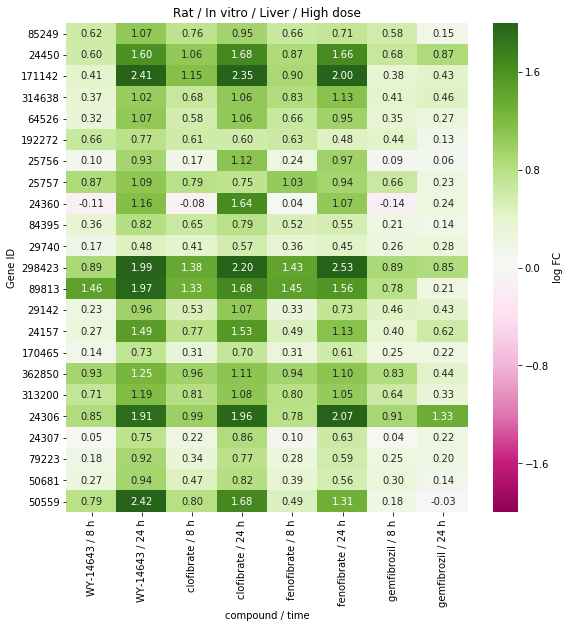

In [181]:
dgplot = dgnew[(dgnew['dose'] == 'high') & (dgnew['time'] > 2)]

dgplot = dgplot.sort_values(by=['compound', 'time'])
dgplot['compound / time'] = dgplot['compound'] + ' / ' + dgplot['time'].astype(str) + ' h'
dgplot = dgplot.set_index('compound / time')
dgplot = dgplot.iloc[:, 9:]

fig, ax = plt.subplots(1, 1, figsize=(9,9))

ax = sns.heatmap(dgplot.T, cmap='PiYG', vmin=-2, vmax=2, annot=True, fmt='.2f', cbar_kws={'label': 'log FC'})
ax.set_title('Rat / In vitro / Liver / High dose')
plt.ylabel('Gene ID')
plt.show()

fig.tight_layout()
fig.savefig('rat_invitro_liver_high.png')

### Rat / In vivo / Liver / Repeat / High dose

In [199]:
deg = []

dg2 = dg[ (dg['organism'] == 'Rat') & (dg['organ'] == 'Liver') & (dg['study'] == 'in_vivo') & (dg['dosing'] == 'Repeat')]

for index, row in dg2.iterrows():
    file = row['limmaNewFile']
    
    lf = pd.read_csv(file)
    
    # find DEG
    assay_deg = lf[((lf['logFC'] > 1) | (lf['logFC'] < -1)) & (lf['P.Value'] < 0.05) ]['ENTREZID'].unique().tolist()
    if len(assay_deg) > 0:
        for gene in assay_deg:
            deg.append(gene)
    
# filter only unique genes
deg = list(set(deg))

dgnew = dg2.copy()

for index, row in dg2.iterrows():
    file = row['limmaNewFile']
    
    dfl = pd.read_csv(file)
    for gene in deg:
        result = dfl[dfl['ENTREZID'] == int(gene)].mean()['logFC']
        dgnew.at[index, str(gene)] = result

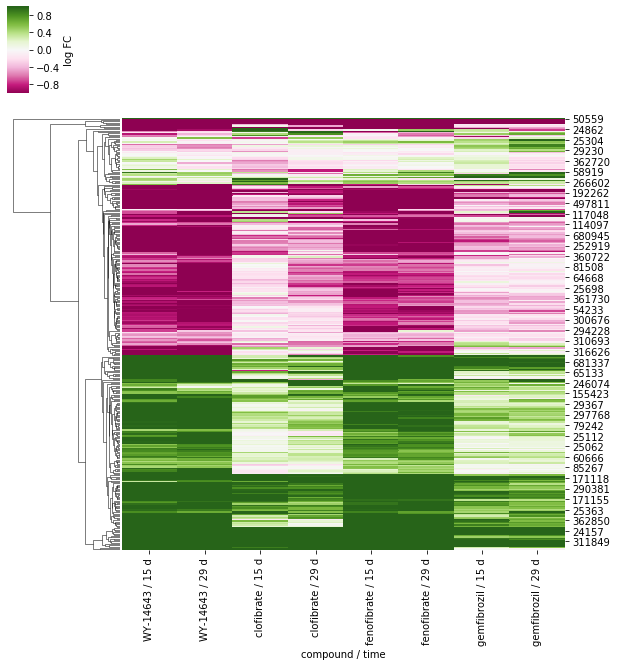

In [204]:
dgplot = dgnew[(dgnew['dose'] == 'high') & (dgnew['time'] > 14)]

dgplot = dgplot.sort_values(by=['compound', 'time'])
dgplot['compound / time'] = dgplot['compound'] + ' / ' + dgplot['time'].astype(str) + ' d'
dgplot = dgplot.set_index('compound / time')
dgplot = dgplot.iloc[:, 9:]

dgplot = dgplot.T.dropna(axis=0, how='any')

ax = sns.clustermap(dgplot, cmap='PiYG', vmin=-1, vmax=1, annot=False, fmt='.2f', cbar_kws={'label': 'log FC'}, col_cluster=False)

ax.savefig('rat_invivo_liver_repeat_high.png')

### Rat / In vivo / Single / High dose

In [186]:
deg = []

dg2 = dg[ (dg['organism'] == 'Rat') & (dg['organ'] == 'Liver') & (dg['study'] == 'in_vivo') & (dg['dosing'] == 'Single')]

for index, row in dg2.iterrows():
    file = row['limmaNewFile']
    
    lf = pd.read_csv(file)
    
    # find DEG
    assay_deg = lf[((lf['logFC'] > 1) | (lf['logFC'] < -1)) & (lf['P.Value'] < 0.05) ]['ENTREZID'].unique().tolist()
    if len(assay_deg) > 0:
        for gene in assay_deg:
            deg.append(gene)
    
# filter only unique genes
deg = list(set(deg))

dgnew = dg2.copy()

for index, row in dg2.iterrows():
    file = row['limmaNewFile']
    
    dfl = pd.read_csv(file)
    for gene in deg:
        result = dfl[dfl['ENTREZID'] == int(gene)].mean()['logFC']
        dgnew.at[index, str(gene)] = result

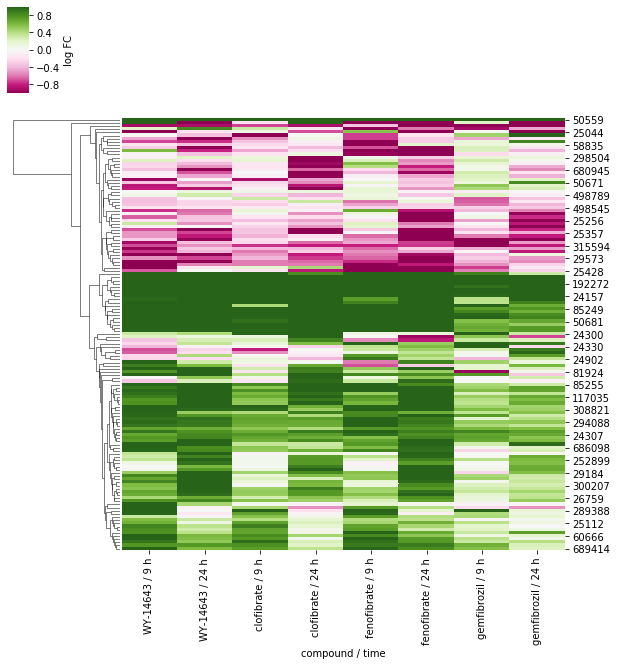

In [194]:
dgplot = dgnew[(dgnew['dose'] == 'high') & (dgnew['time'] >= 9)]

dgplot = dgplot.sort_values(by=['compound', 'time'])
dgplot['compound / time'] = dgplot['compound'] + ' / ' + dgplot['time'].astype(str) + ' h'
dgplot = dgplot.set_index('compound / time')
dgplot = dgplot.iloc[:, 9:]

dgplot = dgplot.T

ax = sns.clustermap(dgplot, cmap='PiYG', vmin=-1, vmax=1, annot=False, fmt='.2f', cbar_kws={'label': 'log FC'}, col_cluster=False)

ax.savefig('rat_invivo_liver_single_high_.png')